# M10T01: Exercicis de Web Scraping
 

## Nivell 0 - 
Test

In [ ]:
import requests

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

print(page.text)

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(id="ResultsContainer")

In [ ]:
print(results.prettify())

In [ ]:
job_elements = results.find_all("div", class_="card-content")

In [ ]:
for job_element in job_elements:
    print(job_element, end="\n"*2)

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

In [ ]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

In [ ]:
print(len(python_jobs))

In [ ]:
python_job_elements = [
    h2_element.parent.parent.parent for h2_element in python_jobs
]

In [ ]:
for job_element in python_job_elements:
    print(job_element)


In [ ]:
for job_element in python_job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")

    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    
    links = job_element.find_all("a")
    for link in links:
        link_url = link["href"]
        print(link["href"])
        print(f"Apply here: {link_url}\n")

In [ ]:
from selenium import webdriver
from selenium.webdriver import Firefox
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as options
from selenium.webdriver.firefox.options import Options as Firefox_Options
serv=Service("C:\\usr\\local\\bin\\geckodriver.exe")



In [ ]:
firefox_options = Firefox_Options()
firefox_options.headless=False
driver = webdriver.Firefox(service=serv,options=firefox_options)
driver.maximize_window()
driver.get('https://duckduckgo.com')

In [ ]:
search_form = driver.find_element(by=By.ID, value='search_form_input_homepage')
search_form.send_keys('real python')
search_form.submit()

In [ ]:
results = driver.find_elements(By.CLASS_NAME,'results')


In [ ]:
print(results[0].text)

In [ ]:
driver.quit()

In [ ]:
opts = Firefox_Options()
opts.headless=False
browser = Firefox(options=opts)
browser.get('https://bandcamp.com')


In [ ]:
browser.find_element(By.CLASS_NAME, 'playbutton').click()

In [ ]:
tracks = browser.find_elements(By.CLASS_NAME, 'discover-item')

In [ ]:
len(tracks)

In [ ]:
tracks[3].click()

In [ ]:
next_button = [e for e in browser.find_elements(By.CLASS_NAME,'item-page')
                   if e.text.lower().find('next') > -1]


In [ ]:
next_button[0].click()


## Nivell1 - 


### Exercici 1
***Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. ***

* http://quotes.toscrape.com
* https://www.bolsamadrid.es
* www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

In [2]:
#Importem les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
pd.options.display.max_columns=None
pd.options.display.max_rows=30

#### Fem webscrapping amb BeautifulSoup i la web http://quotes.toscrape.com

In [3]:
# Despres d'isnalar el necessary importem els requets i el BeautifoulSoup
import requests
from bs4 import BeautifulSoup
URL = "http://quotes.toscrape.com"
pageQuotes = requests.get(URL)



* ***Primerament buscarem les 10 primeres cites i reportarem les cites i l'autor***

In [4]:

soupQuotes = BeautifulSoup(pageQuotes.content, "html.parser")
# busquen el que hi ha  a la classe span 
resultsQuotes = soupQuotes.find_all('span', attrs={'class': 'text'})

In [5]:
# Revisem tots els elements dins dels resutats ( totes les cites amb les seus atributs)
print("Frases famosas :\n\n")
for quote_elements in resultsQuotes:
    for quote_element in quote_elements:
        print("Cita : "+quote_element.text.strip())
        print("Autor: "+quote_element.parent.parent.find("small", class_="author").text.strip())
        print("---")


Frases famosas :


Cita : “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Autor: Albert Einstein
---
Cita : “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Autor: J.K. Rowling
---
Cita : “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Autor: Albert Einstein
---
Cita : “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Autor: Jane Austen
---
Cita : “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Autor: Marilyn Monroe
---
Cita : “Try not to become a man of success. Rather become a man of value.”
Autor: Albert Einstein
---
Cita : “It is better to be hated for what you are than to be loved for what you are not.”
Autor: André Gide
---
Cita : “I have not failed. I've just found 10,000 ways

* ***Segidament mostrarem les 10 paraules clau mes aparegudes en frases famoses i donarem el link per accedir***

In [6]:
topTenTags = soupQuotes.find_all('span', attrs={'class': 'tag-item'})
print(topTenTags)

[<span class="tag-item">
<a class="tag" href="/tag/love/" style="font-size: 28px">love</a>
</span>, <span class="tag-item">
<a class="tag" href="/tag/inspirational/" style="font-size: 26px">inspirational</a>
</span>, <span class="tag-item">
<a class="tag" href="/tag/life/" style="font-size: 26px">life</a>
</span>, <span class="tag-item">
<a class="tag" href="/tag/humor/" style="font-size: 24px">humor</a>
</span>, <span class="tag-item">
<a class="tag" href="/tag/books/" style="font-size: 22px">books</a>
</span>, <span class="tag-item">
<a class="tag" href="/tag/reading/" style="font-size: 14px">reading</a>
</span>, <span class="tag-item">
<a class="tag" href="/tag/friendship/" style="font-size: 10px">friendship</a>
</span>, <span class="tag-item">
<a class="tag" href="/tag/friends/" style="font-size: 8px">friends</a>
</span>, <span class="tag-item">
<a class="tag" href="/tag/truth/" style="font-size: 8px">truth</a>
</span>, <span class="tag-item">
<a class="tag" href="/tag/simile/" sty

In [7]:
print("Frases per top 10 paraules clau\n")
for tagElements in topTenTags:
        print(tagElements.text.strip())
        links = tagElements.find_all("a")
        for link in links:
            link_url = "http://quotes.toscrape.com"+link["href"]
            print(f"Apply here: {link_url}\n")

Frases per top 10 paraules clau

love
Apply here: http://quotes.toscrape.com/tag/love/

inspirational
Apply here: http://quotes.toscrape.com/tag/inspirational/

life
Apply here: http://quotes.toscrape.com/tag/life/

humor
Apply here: http://quotes.toscrape.com/tag/humor/

books
Apply here: http://quotes.toscrape.com/tag/books/

reading
Apply here: http://quotes.toscrape.com/tag/reading/

friendship
Apply here: http://quotes.toscrape.com/tag/friendship/

friends
Apply here: http://quotes.toscrape.com/tag/friends/

truth
Apply here: http://quotes.toscrape.com/tag/truth/

simile
Apply here: http://quotes.toscrape.com/tag/simile/



#### ***Fem scarapping de wikipedia fent servir Selenium***

   ***importem les llibreries necessaries***

In [8]:

import pandas as pd
from selenium import webdriver
from selenium.webdriver import Firefox
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as options
from selenium.webdriver.firefox.options import Options as Firefox_Options


In [9]:
serv=Service("C:\\usr\\local\\bin\\geckodriver.exe")

In [10]:
firefox_options = Firefox_Options()
firefox_options.headless=False
driver1 = webdriver.Firefox(service=serv,options=firefox_options)
driver1.maximize_window()

In [11]:
driver1.get('https://www.wikipedia.org/')


In [12]:
search_form = driver1.find_element(by=By.ID, value='searchInput')


In [13]:
print(search_form)

<selenium.webdriver.remote.webelement.WebElement (session="ee9aba67-e1ce-4180-9ff9-c6b1dc1f0551", element="efcdadcf-9c58-4dc1-98dd-82df0daed2c7")>


In [14]:
search_form.send_keys('rius mes llargs')
search_form.submit()

In [17]:
resultaQuery = driver1.find_elements(By.CLASS_NAME,'mw-search-result')

In [18]:
for elem in resultaQuery:
    print(elem.text)
    print("---")

Llista dels rius més llargs
Aquesta és la llista dels rius més llargs de la Terra, per sobre de 1.000 kilòmetres de longitud. En alguns casos, el curs fluvial que s'ha considerat...
20 Ko (735 paraules) - 01:16, 11 juny 2022
---
Rius més llargs d'Ucraïna
la taula dels rius més llargs d'Ucraïna. Inclou els rius que, exclusivament dins del territori d'Ucraïna, fan 100 km o més de llargada. Conques: Conca...
37 Ko (646 paraules) - 23:50, 8 març 2022
---
Llista de rius d'Ucraïna
la Categoria:Rius d'Ucraïna i l'article Rius més llargs d'Ucraïna Aquesta és una llista no-exhaustiva de rius d'Ucraïna, per conca i agrupant tributaris...
29 Ko (3.326 paraules) - 11:13, 8 abr 2022
---
Huai He (categoria Rius de la Xina)
xinès:淮|河 Huái Hé) és un dels rius principals de la Xina. És a mig camí del riu Groc i el riu Yangtze, els dos rius més llargs de la Xina i com ells flueix...
960 octets (128 paraules) - 21:54, 12 set 2022
---
Llista de rius de Letònia
Rius de Letònia: Rius que superen els 100 km:

In [19]:
rels1=driver1.find_element(By.LINK_TEXT,"Llista dels rius més llargs")

In [20]:
LLista=rels1.click()

In [48]:
body=driver1.find_elements(By.TAG_NAME,'tbody')

trElements=body[2].find_elements(By.TAG_NAME,'tr')
riusNom=[]
riusLon=[]
riusConca=[]
riusCabdal=[]
for rius in trElements:
    riu=rius.find_element(By.TAG_NAME,'a')
    riusNom.append(riu.text)
    tdRius=rius.find_elements(By.TAG_NAME,'td')
    riusLon.append(tdRius[2].text)
    riusConca.append(tdRius[3].text)
    riusCabdal.append(tdRius[4].text)


In [49]:
riusMesLlargsDf = pd.DataFrame()
riusMesLlargsDf['Nom']=riusNom
riusMesLlargsDf['Nom'] =riusMesLlargsDf['Nom'].astype('string')
riusMesLlargsDf['Long']=riusLon
riusMesLlargsDf['Conca']=riusConca
riusMesLlargsDf['Cabdal']=riusCabdal

In [50]:
riusMesLlargsDf

,Nom,Long,Conca,Cabdal
0,Amazones,6.400\n(6.992),7.050.000,219.000
1,Congo,4.700,3.680.000,41.800
2,Nil,6.650\n(6.853),3.254.555,5.100
3,Obi,5.410,2.990.000,12.800
4,Mississipí,6.275,2.980.000,16.200
5,Paranà,4.880,2.582.672,18.000
6,Ienissei,5.539,2.580.000,19.600
7,Lena,4.400,2.490.000,17.100
8,Níger,4.200,2.090.000,9.570
9,Amur,4.444,1.855.000,11.400


In [51]:
pd.set_option('max_rows', 100)
import re
regex=re.compile(r'[+-]?\d*\.?\d+')
riusMesLlargsDf['longTmp']=riusMesLlargsDf["Long"].apply(lambda x:regex.findall(x)) 
riusMesLlargsDf['Longitud']=riusMesLlargsDf['longTmp'].apply(lambda x: x[0])

In [52]:
riusMesLlargsDf.describe()

,Nom,Long,Conca,Cabdal,longTmp,Longitud
count,85,85,85,85,85,85
unique,84,79,59,54,79,77
top,Colorado,1.600,,,[1.600],1.600
freq,2,4,25,32,4,4


In [53]:
riusMesLlargsDf.drop(['longTmp','Long'],axis=1,inplace=True)
riusMesLlargsDf.Longitud=pd.to_numeric(riusMesLlargsDf.Longitud, downcast='integer')


In [54]:
riusMesLlargsDf

,Nom,Conca,Cabdal,Longitud
0,Amazones,7.050.000,219.000,6.400
1,Congo,3.680.000,41.800,4.700
2,Nil,3.254.555,5.100,6.650
3,Obi,2.990.000,12.800,5.410
4,Mississipí,2.980.000,16.200,6.275
5,Paranà,2.582.672,18.000,4.880
6,Ienissei,2.580.000,19.600,5.539
7,Lena,2.490.000,17.100,4.400
8,Níger,2.090.000,9.570,4.200
9,Amur,1.855.000,11.400,4.444


In [56]:
#riusMesLlargsDf.Conca=pd.to_numeric(riusMesLlargsDf.Conca.str.strip('"'), downcast='float')


In [58]:
riusMesLlargsDf.dtypes

Nom          string
Conca        object
Cabdal       object
Longitud    float64
dtype: object

In [59]:
riusMesLlargsDf

,Nom,Conca,Cabdal,Longitud
0,Amazones,7.050.000,219.000,6.400
1,Congo,3.680.000,41.800,4.700
2,Nil,3.254.555,5.100,6.650
3,Obi,2.990.000,12.800,5.410
4,Mississipí,2.980.000,16.200,6.275
5,Paranà,2.582.672,18.000,4.880
6,Ienissei,2.580.000,19.600,5.539
7,Lena,2.490.000,17.100,4.400
8,Níger,2.090.000,9.570,4.200
9,Amur,1.855.000,11.400,4.444


In [60]:
check_for_nan = riusMesLlargsDf.isnull().values.any()

In [61]:
check_for_nan

False

In [62]:
riusMesLlargsDf

,Nom,Conca,Cabdal,Longitud
0,Amazones,7.050.000,219.000,6.400
1,Congo,3.680.000,41.800,4.700
2,Nil,3.254.555,5.100,6.650
3,Obi,2.990.000,12.800,5.410
4,Mississipí,2.980.000,16.200,6.275
5,Paranà,2.582.672,18.000,4.880
6,Ienissei,2.580.000,19.600,5.539
7,Lena,2.490.000,17.100,4.400
8,Níger,2.090.000,9.570,4.200
9,Amur,1.855.000,11.400,4.444


### Exercici 2
***Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle***

* Per saber més
  A manera d'exemple del que es demana pots consultar aquest enllaç:
  https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats.

***Els fitxer el penjo al GitHUb del exercici***


***Es una mica fluix però ja m'e quedat sense temps , he fet també una latre taula amb Selenium que es mes àmplia ( estadistiques violacisons)***


***Aquest tema m'ha costat força en general ,totalment nou per a mí i tinc poca solura amb el HTML XPATH etc.En qualsevol cas el temps dedicat m'ha servit molt per entendre mes el tema del scrappy i la vinculació amb python. Molt interessant***


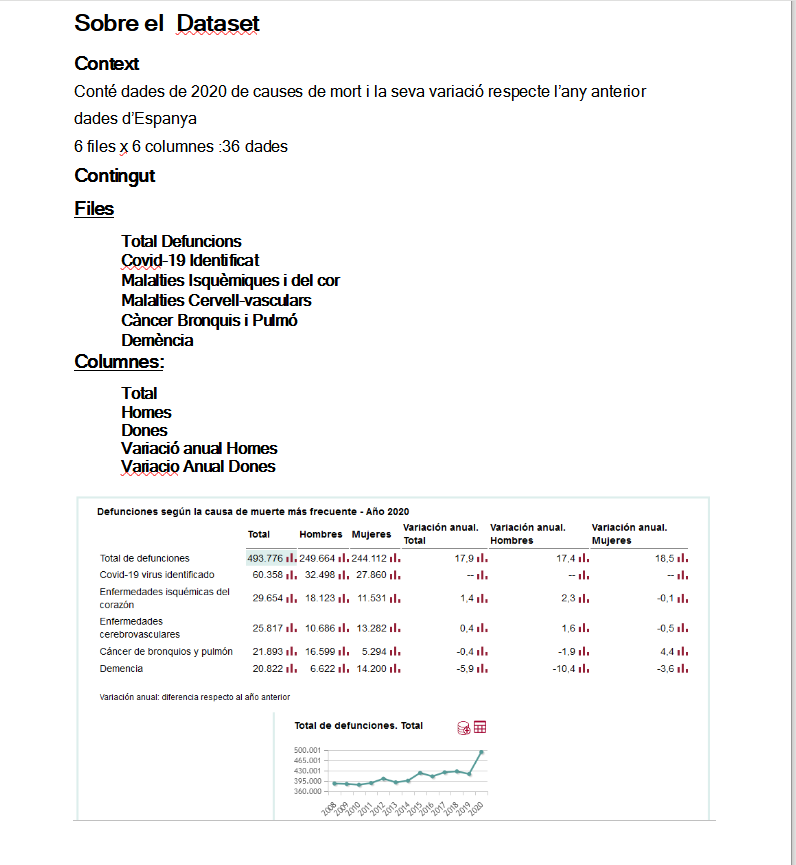

### Exercici 3
***Tria una pàgina web que tu vulguis i realitza web scraping mitjançant la llibreria Selenium primer i Scrapy després.***


#### ***Selenium***

***De la wikipedia busquen estadístiques de violacions per país,troben el enllaç que porta a la taula i fem clic***
***Postariorment amb la console ens ajudem per localitzar els elements que estem interessats*** 

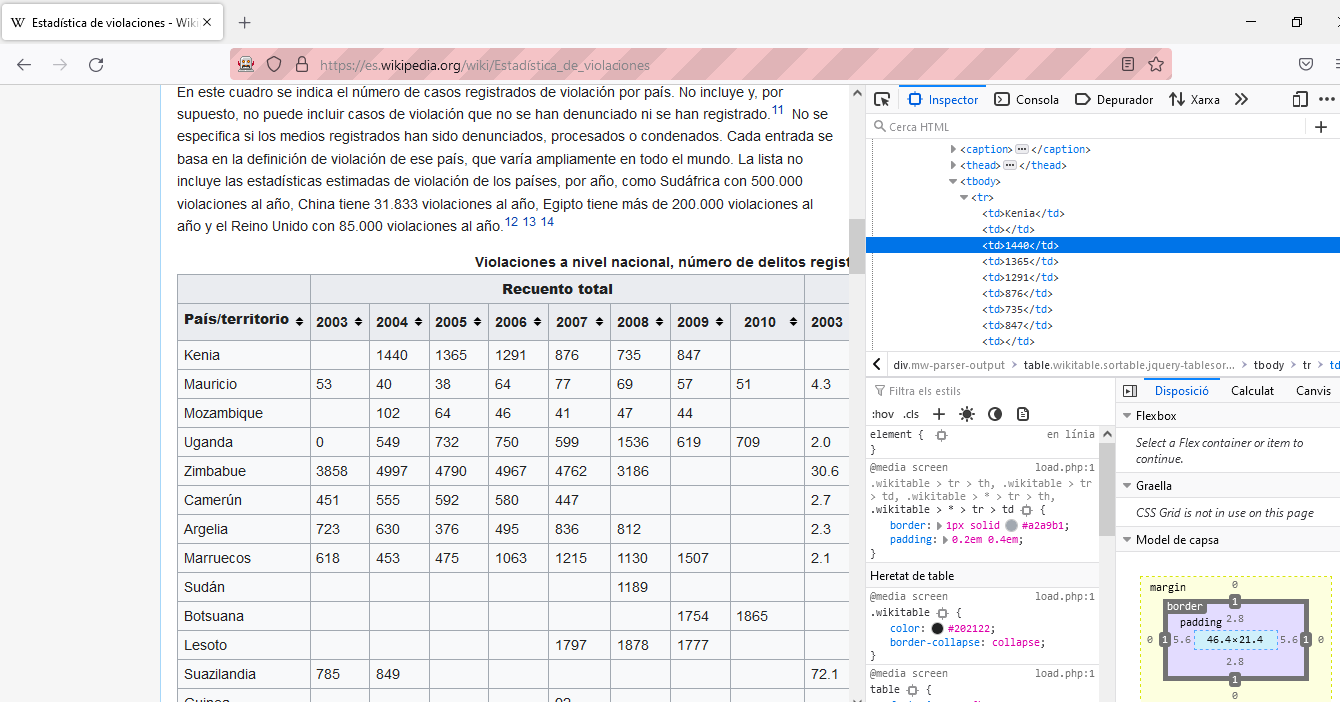


In [63]:
# He fet primer les instalacions necesaries per importar les llibreries de selenium
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver import Firefox
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as options
from selenium.webdriver.firefox.options import Options as Firefox_Options


In [64]:
serv=Service("C:\\usr\\local\\bin\\geckodriver.exe")

In [65]:
firefox_options = Firefox_Options()
firefox_options.headless=False
driver1 = webdriver.Firefox(service=serv,options=firefox_options)
driver1.maximize_window()

In [66]:
driver1.get('https://www.wikipedia.es/')


In [67]:
search_form = driver1.find_element(by=By.ID, value='searchInput')


In [68]:
search_form.send_keys('Estadisticas_violaciones')


In [69]:
search_form.submit()

In [70]:
rels1=driver1.find_element(By.LINK_TEXT,"Estadística de violaciones")

In [71]:
LLista=rels1.click()

***busquen els text dels elements de la taula (tbody->tr->td***
***iterem primer per tr despres per td i arreglem els problemes amb els tipus ( hi han elements que tenen notes)***

In [73]:
temp=[]
tbody=driver1.find_element(By.TAG_NAME,'tbody')
trElements=tbody.find_elements(By.TAG_NAME,'tr')
for trElement in trElements:
    itera=0
    tdElements=trElement.find_elements(By.TAG_NAME,'td')
    for tdElement in tdElements:
        if itera==0:
            temp.append(tdElement.text)
            itera=itera+1
        else:
            if tdElement.text=="":
                temp.append(np.NAN)
            else:
                desglose=[float(s) for s in re.findall(r'-?\d+\.?\d*', tdElement.text)]
                temp.append(desglose[0]*1)


***Pasem de una lista an un np array i despres fen un reshape per posar-lo en fotmat 122 files i 17 columnes***

In [77]:
tempRehsape = np.asarray(temp)
tempRehsapeArray1 = np.reshape(tempRehsape,(122, 17))
tempRehsapeArray1

array([['Kenia', 'nan', '1440.0', ..., '1.9', '2.1', 'nan'],
       ['Mauricio', '53.0', '40.0', ..., '5.4', '4.4', '3.9'],
       ['Mozambique', 'nan', '102.0', ..., '0.2', '0.2', 'nan'],
       ...,
       ['Nueva Zelanda', 'nan', 'nan', ..., '26.4', '26.1', '25.8'],
       ['Sudáfrica', 'nan', '69117.0', ..., '144.8', '138.5', '132.4'],
       ['Islas Solomon', 'nan', '170.0', ..., '11.0', 'nan', 'nan']],
      dtype='<U32')

***Preparem per carregar a una dataframe i li posem el nom a les columes de forma manual ( es podria haver fet via programacio)***

In [78]:
data_df = pd.DataFrame(tempRehsapeArray1,columns=['Pais1','Tot2003','Tot2004','Tot2005' ,'Tot2006' ,'Tot2007' ,'Tot2008','Tot2009' ,'Tot2010','Tasa2003', 'Tasa2004','Tasa2005' ,'Tasa2006','Tasa2007','Tasa2008','Tasa2009','Tasa2010'])

In [79]:
data_df

,Pais1,Tot2003,Tot2004,Tot2005,Tot2006,Tot2007,Tot2008,Tot2009,Tot2010,Tasa2003,Tasa2004,Tasa2005,Tasa2006,Tasa2007,Tasa2008,Tasa2009,Tasa2010
0,Kenia,nan,1440.0,1365.0,1291.0,876.0,735.0,847.0,nan,nan,4.1,3.8,3.5,2.3,1.9,2.1,nan
1,Mauricio,53.0,40.0,38.0,64.0,77.0,69.0,57.0,51.0,4.3,3.2,3.0,5.1,6.0,5.4,4.4,3.9
2,Mozambique,nan,102.0,64.0,46.0,41.0,47.0,44.0,nan,nan,0.5,0.3,0.2,0.2,0.2,0.2,nan
3,Uganda,0.0,549.0,732.0,750.0,599.0,1536.0,619.0,709.0,2.0,2.0,2.6,2.6,2.0,4.9,1.9,2.1
4,Zimbabue,3858.0,4997.0,4790.0,4967.0,4762.0,3186.0,nan,nan,30.6,39.7,38.1,39.6,38.2,25.6,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Suizanota 1,547.0,573.0,646.0,639.0,648.0,612.0,666.0,543.0,7.5,7.8,8.7,8.6,8.6,8.1,8.7,7.1
118,Australia,nan,nan,nan,nan,nan,6382.0,6343.0,6378.0,nan,nan,nan,nan,nan,29.7,29.0,28.6
119,Nueva Zelanda,nan,nan,994.0,1183.0,1143.0,1130.0,1128.0,1129.0,nan,nan,24.0,28.3,27.0,26.4,26.1,25.8
120,Sudáfrica,nan,69117.0,68076.0,65201.0,63818.0,70514.0,68332.0,66196.0,nan,148.4,145.2,137.6,133.4,144.8,138.5,132.4


In [80]:
data_df1 = data_df.astype( dtype={'Pais1':str,'Tot2003' : float,'Tot2004' : float,'Tot2005' : float,'Tot2006' : float,'Tot2007' : float,'Tot2008' : float,'Tot2009' : float,'Tasa2010' :float ,'Tasa2003' : float,'Tasa2004' : float,'Tasa2005' : float,'Tasa2006' : float,'Tasa2007' : float,'Tasa2008' : float,'Tasa2009' : float,'Tasa2010' : float}) 

In [81]:
data_df1

,Pais1,Tot2003,Tot2004,Tot2005,Tot2006,Tot2007,Tot2008,Tot2009,Tot2010,Tasa2003,Tasa2004,Tasa2005,Tasa2006,Tasa2007,Tasa2008,Tasa2009,Tasa2010
0,Kenia,NaN,1440.0,1365.0,1291.0,876.0,735.0,847.0,nan,NaN,4.1,3.8,3.5,2.3,1.9,2.1,NaN
1,Mauricio,53.0,40.0,38.0,64.0,77.0,69.0,57.0,51.0,4.3,3.2,3.0,5.1,6.0,5.4,4.4,3.9
2,Mozambique,NaN,102.0,64.0,46.0,41.0,47.0,44.0,nan,NaN,0.5,0.3,0.2,0.2,0.2,0.2,NaN
3,Uganda,0.0,549.0,732.0,750.0,599.0,1536.0,619.0,709.0,2.0,2.0,2.6,2.6,2.0,4.9,1.9,2.1
4,Zimbabue,3858.0,4997.0,4790.0,4967.0,4762.0,3186.0,NaN,nan,30.6,39.7,38.1,39.6,38.2,25.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Suizanota 1,547.0,573.0,646.0,639.0,648.0,612.0,666.0,543.0,7.5,7.8,8.7,8.6,8.6,8.1,8.7,7.1
118,Australia,NaN,NaN,NaN,NaN,NaN,6382.0,6343.0,6378.0,NaN,NaN,NaN,NaN,NaN,29.7,29.0,28.6
119,Nueva Zelanda,NaN,NaN,994.0,1183.0,1143.0,1130.0,1128.0,1129.0,NaN,NaN,24.0,28.3,27.0,26.4,26.1,25.8
120,Sudáfrica,NaN,69117.0,68076.0,65201.0,63818.0,70514.0,68332.0,66196.0,NaN,148.4,145.2,137.6,133.4,144.8,138.5,132.4


In [82]:
data_df1.describe()

,Tot2003,Tot2004,Tot2005,Tot2006,Tot2007,Tot2008,Tot2009,Tasa2003,Tasa2004,Tasa2005,Tasa2006,Tasa2007,Tasa2008,Tasa2009,Tasa2010
count,71.000000,85.000000,101.000000,101.000000,89.000000,89.000000,82.000000,71.000000,85.000000,101.000000,101.000000,89.000000,89.000000,82.000000,62.000000
mean,2522.478873,3255.129412,2858.396040,2861.623762,7425.685393,3208.280899,3336.865854,9.691775,12.598824,10.823762,10.302178,11.707865,11.701124,14.325610,14.209677
std,11195.158532,12709.436819,11565.812636,11420.050114,42612.018706,12142.266705,12374.314203,12.720803,20.891793,17.673987,16.115657,19.129880,19.531958,22.217315,22.026829
min,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.300000,0.300000,0.200000,0.200000,0.200000,0.000000,0.000000
25%,70.000000,98.000000,89.000000,95.000000,107.000000,105.000000,90.250000,2.350000,2.500000,2.500000,2.100000,2.100000,2.400000,2.300000,2.200000
50%,432.000000,453.000000,387.000000,353.000000,355.000000,396.000000,400.500000,5.300000,5.700000,5.800000,5.300000,4.900000,4.900000,5.800000,6.500000
75%,1433.000000,1432.000000,1365.000000,1484.000000,1514.000000,1596.000000,1646.250000,10.550000,13.500000,12.600000,12.200000,12.700000,13.300000,18.125000,20.900000
max,93883.000000,95089.000000,94347.000000,94472.000000,389015.000000,90750.000000,89241.000000,72.100000,148.400000,145.200000,137.600000,133.400000,144.800000,138.500000,132.400000


In [113]:
tempRehsapeArray1 = np.reshape(tempRehsape,(122, 17))

***Exportem a csv***

In [86]:
data_df1.to_csv (r'C:\\Users\\Lenovo\Desktop\\DataScience\\tasques_ITAcademy\\10 Web_Scraping\Estadisticas_violacions.csv', index = False, header=True)

#### ***Scrapy***

***Faig ara un cas similar aamb un altre Web però fent servir scrapy***

*He fet aquesta url
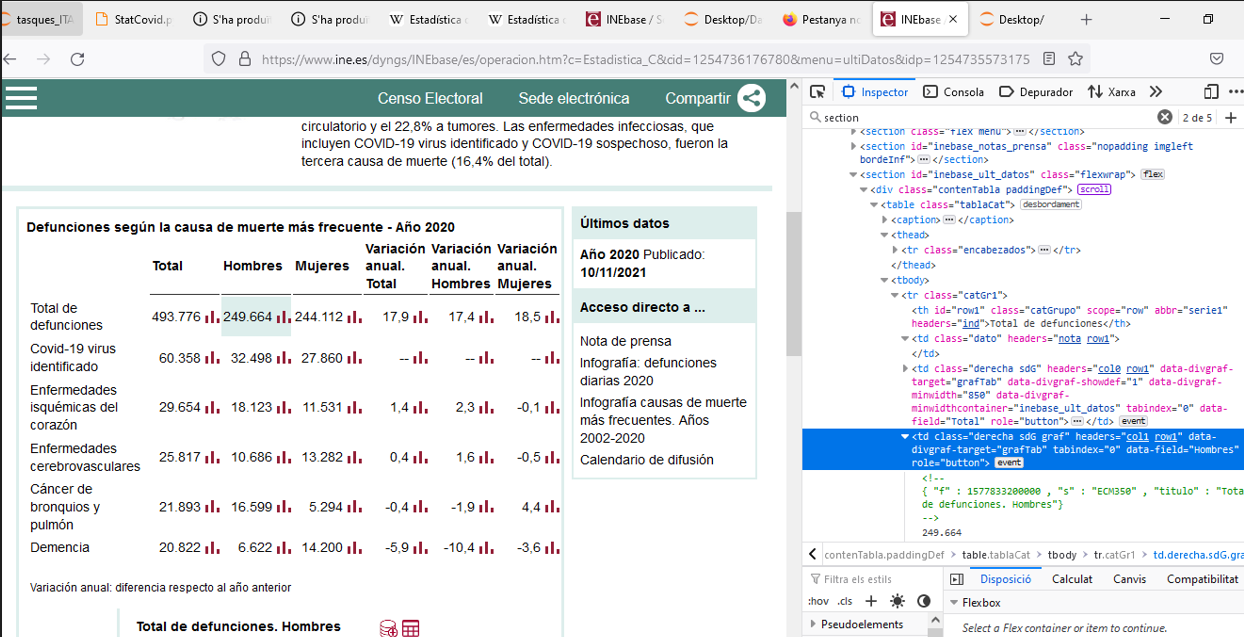

In [1]:
import scrapy

# Primer de tot he instalat el scrapy amb el pip
# Her creat el projecte StatCovid
# Despres he inspeccionat la url amb el developer tools per identifcar la taula de covid de la que estava interessat
# He fet servir el xpath per identificar els elements necesaris per raspar la taula estadístiques covid
# He creat el arxiu python amb la spider amb el parse 
# Una vegada tinc les dades genero un DICT per exportar-lo amb format CSV

# Tot se m'ha complicat , pero el nom de les files i les columnes també les podria haver tret de la web pero m'ha faltata temps, le he fet manualment


class StatCovidSpider(scrapy.Spider):
    name = "StatCovid"
    custom_settings = {
        'FEED_URI': 'stadisticasCovid.csv',
        'FEED_FORMAT': 'csv'
    }   
    	
    start_urls = [
        "https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176780&menu=ultiDatos&idp=1254735573175"
    ]


    def parse(self, response):
        posind=0
        fil=[1,2,3,4,5,6] # Files de la taula de la web
        col=[2,4,6,8,10,12] # Posició de les columnes del array scrapy
        
        # Defineixo nom de les columnes
        columna = ['','','Total','',"Hombres",'','Mujeres','','Variacion Anual Tot.','','Variacion anual Hombres','','Variacion anual Mujeres']
       
        # Defineixo nom de les files
        fila = ['Total Defunciones','Covid-19 Virus Identificado','Enfermedades Isquemicas y Corazon','Identificado','Enfermedades Cerebrovasculares','Enfermedades Bronquio y Pulmon','Demencia']
       
        # Obtencio dels valors de la taula a la que fem scrap
        valorsStat= response.xpath('//section[contains(@class,"flexwrap")]//table//tbody//tr//td/text()').getall()
        
        # En disposo a generar un dicionari que exportaré a csv amb el yield, tindra nom fila nom columna i valor
        posicion=2
        for i in fil:
            for j in col:
                # paso el valor a float amb control errors
                valorString=valorsStat[posicion]
                valorString=valorString.replace(".","")
                valorString=valorString.replace(",",".")
                try:
                    valorFloat=float(valorString)
                except ValueError:
                    posicion=posicion-1 # quan no tenim valors poso 0 i anem una posició enrera
                    valorFloat=0       
                info= {
                    'Fila': fila[i-1],
                    'Columna' : columna[j],
                    'valor': valorFloat
                }
                yield info
                posicion=posicion+2 #les dades van de 2 en 2 ments quan el valor es nul
            posicion=posicion+1 #al final de cada file hi ha una posició mes

***Projecte  directoris***
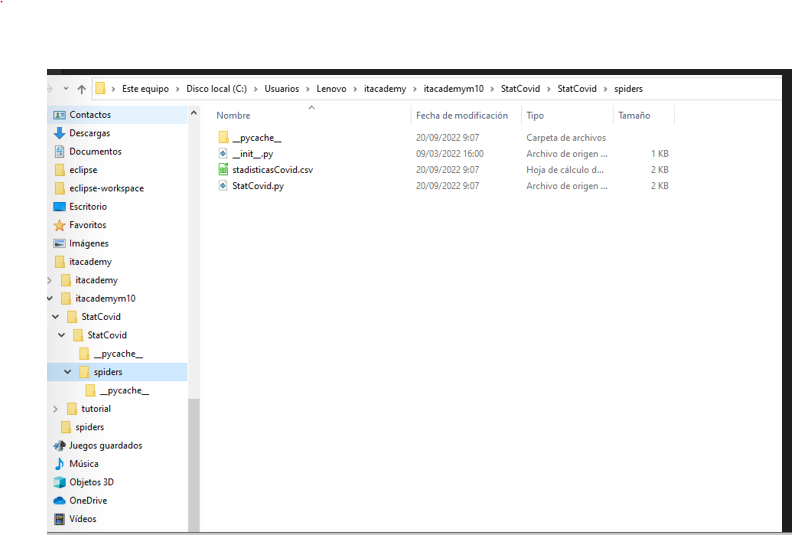

***Al llençar la comanda el el shell***
* ***scrapy crawl StatCovid***
***Es executa el spider (StatCovid) que hen fet en python i ens genera en csv el diccionari que hem creat per cada element de la taula***
***Deixo el fitxer csv en el GitHub***

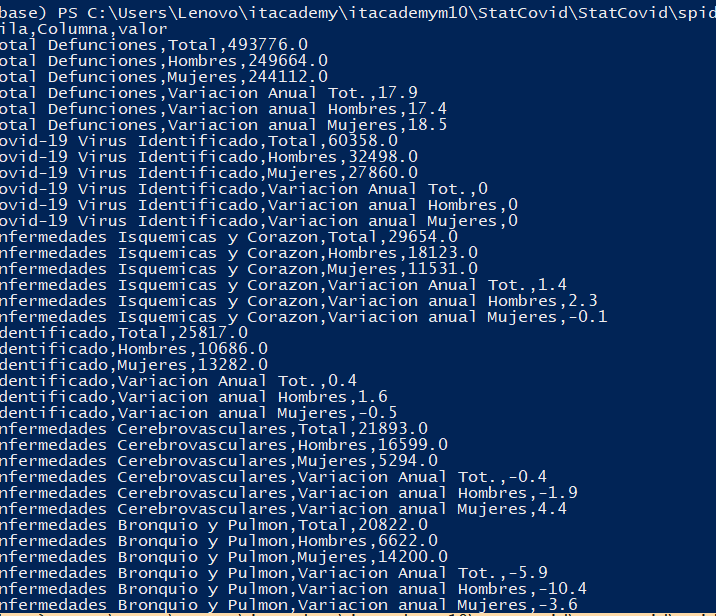
